This notebook contains different visualization tools using Matplotlib, Seaborn, and folium. 

Matplotlib is used to generate line plots, area plots, histogram, bar charts, box plots, and pie charts; Seaborn is used to generate attractive statistical graphics; folium is used to create a map and visualize geospatial data.

# Dataset
The United Nations dataset on immigration to Canada is used throughout the course. 

# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data into a pandas dataframe

df = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

In [3]:
#short summary of the dataframe
a= df.info(verbose=False)

#list of index
b= df.index

#list of columns
c= df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 51 entries, Type to Unnamed: 50
dtypes: float64(8), int64(37), object(6)
memory usage: 77.8+ KB


In [4]:
#print the data type for the 'columns' and 'index'
print(type(df.columns))
print(type(df.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [5]:
#convert 'columns' and 'index' to 'list' data type
print(type(df.columns.tolist()))
print(type(df.index.tolist()))

<class 'list'>
<class 'list'>


In [6]:
#view dimension of dataframe (rows, columns)
df.shape

(195, 51)

# DATA WRANGLING

In [7]:
#drop unnecessary columns
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

#drop unnamed columns
df.dropna(axis=1, inplace=True)

#rename columns
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

In [8]:
#create a 'total' column
df['Total']= df.sum(axis=1)

In [9]:
#check to see the number of Null values in the dataset
df.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [10]:
#give a quick summary of each column in the dataframe
df.describe(include='all')

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195,195,195,195,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
unique,195,6,22,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Austria,Africa,Western Asia,Developing regions,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,54,18,147,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,NaN,NaN,NaN,NaN,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,NaN,NaN,NaN,NaN,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,NaN,NaN,NaN,NaN,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000


There are main 2 ways to select rows:

```python
    df.loc[label]    # filters by the labels of the index/column
    df.iloc[index]   # filters by the positions of the index/column
```

Before we proceed, notice that the default index of the dataset is a numeric range from 0 to 194. This makes it very difficult to do a query by a specific country. For example to search for data on Japan, we need to know the corresponding index value.

This can be fixed very easily by setting the 'Country' column as the index using `set_index()` method.

Tip: The opposite of set is reset. So to reset the index, we can use 'df_can.reset_index()'


In [11]:
#set index to 'Country'
df.set_index('Country', inplace=True)

#optional: remove the name of the index
df.index.name= None

In [12]:
#select row based on label
df.loc['Algeria']

#alternatively: select row based on index
df.iloc[2]

Continent                Africa
Region          Northern Africa
DevName      Developing regions
1980                         80
1981                         67
1982                         71
1983                         69
1984                         63
1985                         44
1986                         69
1987                        132
1988                        242
1989                        434
1990                        491
1991                        872
1992                        795
1993                        717
1994                        595
1995                       1106
1996                       2054
1997                       1842
1998                       2292
1999                       2389
2000                       2867
2001                       3418
2002                       3406
2003                       3072
2004                       3616
2005                       3626
2006                       4807
2007                       3623
2008    

In [13]:
df[df.index=='Algeria']

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [14]:
# value for year 2013
df.loc['Algeria', 2013]

4331

In [15]:
#alternatively: 
#year 2013 is the last column, with a positional index of 36
df.iloc[2, 36]

4331

In [16]:
#values for year 1980 to 1985
df.loc['Algeria', [1980, 1981, 1982, 1983, 1984, 1985]]

1980    80
1981    67
1982    71
1983    69
1984    63
1985    44
Name: Algeria, dtype: object

In [17]:
#alternatively:
df.iloc[87, [3, 4, 5, 6, 7, 8]]

1980    701
1981    756
1982    598
1983    309
1984    246
1985    198
Name: Japan, dtype: object

In [18]:
#column name as an integer
df[2013]

Afghanistan       2004
Albania            603
Algeria           4331
American Samoa       0
Andorra              1
                  ... 
Viet Nam          2112
Western Sahara       0
Yemen              217
Zambia              59
Zimbabwe           407
Name: 2013, Length: 195, dtype: int64

**Check to see if the column labels are strings**

In [19]:
all(isinstance(column, str) for column in df.columns)

False

To avoid this ambuigity, let's convert the 'column names' into strings (including '1980' to '2013').

In [20]:
#this converts all column names to string
df.columns = list(map(str, df.columns))

**Check again to see if all column names are strings**

In [21]:
all(isinstance(column, str) for column in df.columns)

True

In [22]:
#column name as a string
df['2013']

Afghanistan       2004
Albania            603
Algeria           4331
American Samoa       0
Andorra              1
                  ... 
Viet Nam          2112
Western Sahara       0
Yemen              217
Zambia              59
Zimbabwe           407
Name: 2013, Length: 195, dtype: int64

In [23]:
#create a variable that will allow us to easily call upon the full range of years:
years = list(map(str, range(1980, 2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

## Filtering Dataframe based on cateria

To filter the dataframe based on a condition, we simply pass the condition as a boolean vector. (aka: Create the condition boolean series)

In [24]:
#filter the dataframe to show the data on Asian countries
df['Continent']== 'Asia'


Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Viet Nam           True
Western Sahara    False
Yemen              True
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool

In [25]:
#alternatively, we can pass the condition inside the dataframe
df[df['Continent']=='Asia']

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,...,4,5,11,10,5,12,6,3,6,600
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,...,370,529,460,354,203,200,196,233,288,6538
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
"China, Hong Kong Special Administrative Region",Asia,Eastern Asia,Developing regions,0,0,0,0,0,0,0,...,729,712,674,897,657,623,591,728,774,9327


In extension, we can pass multiple conditions into the dataframe.

**Note:** use '&' and '/' instead of 'and' and 'or'

In [26]:
#filter for AreaName= Asia and RegName= Southern Asia

df[(df['Continent']== 'Asia') & (df['Region']=='Southern Asia')]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,...,0,0,2,1,7,4,3,1,1,30
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,...,607,540,511,581,561,1392,1129,1185,1308,10222
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


In [27]:
#review of all changes made

print(df.shape)
print(df.columns)

(195, 38)
Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')


## VISUALIZING DATA USING MATPLOTLIB

In [28]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

## Line Plot

**Case study:**

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and about three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a Line plot:

**Question:** Plot a line graph of immigration from Haiti using `df.plot()`.

Text(0, 0.5, 'Number of Immigrants')

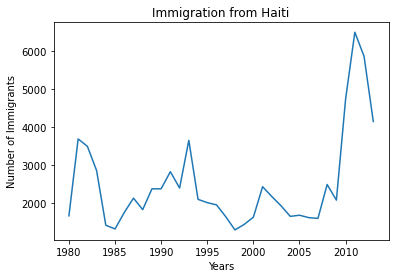

In [29]:
#select row based on label and years
haiti= df.loc['Haiti', years]

#plot
haiti.plot()

plt.title('Immigration from Haiti')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

In the figure, it is obvious that the number of Haiti migrants into Canada increased significantly in 2010.

Lets mark this observation using `plt.text(x, y, label)`.


**Recall** Years in the x-axis is a list of strings. Convert to `int`. 

Text(2000, 6000, '2010 Earthquake')

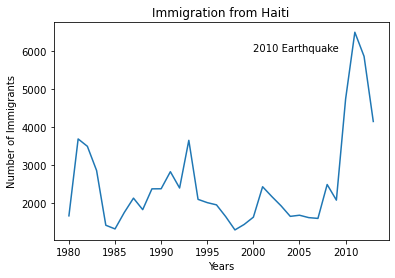

In [30]:
#convert the index of haiti graph to 'int'
haiti.index= haiti.index.map(int)

#plot
haiti.plot()

plt.title('Immigration from Haiti')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

#text
plt.text(2000, 6000, '2010 Earthquake')
 

**Quick note on x and y values in `plt.text(x, y, label):`**

 Since the x-axis (years) is type 'integer', we specified x as a year. The y axis (number of immigrants) is type 'integer', so we can just specify the value y = 6000.
 
     plt.text(2000, 6000, '2010 Earthquake')
years stored as type int

If the years were stored as type 'string', we would need to specify x as the index position of the year. Eg 20th index is year 2000 since it is the 20th year with a base year of 1980.
       
       plt.text(20, 6000, '2010 Earthquake')
years stored as type int

**Question:** Let's compare the number of immigrants from India and China from 1980 to 2013.

Step 1: Get the data set for China and India, and display the dataframe

In [31]:
#select rows based on labels and years
df_CI= df.loc[['India', 'China'] , years]

Since `df_CI` is a dataframe with the 'country' as the index and 'years' as the columns, we must first transpose the dataframe using `.transpose()` method to swap the row and columns.

In [32]:
#transpose
df_CI= df_CI.transpose()


Text(0, 0.5, 'Number of Immigrants')

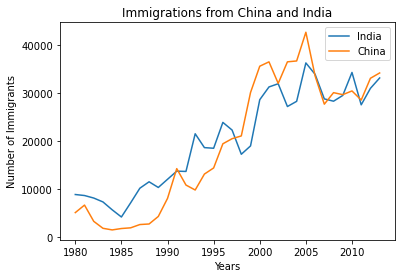

In [33]:
#convert df_CI index to 'int'
df_CI.index= df_CI.index.map(int)

#plot
df_CI.plot()

plt.title('Immigrations from China and India')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')


**Note:** How come we didn't need to transpose Haiti's dataframe before plotting (like we did for `df_CI`)?

That's because haiti is a `series` as opposed to a `dataframe`, and has the years as its indices.

**Question:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

Text(0, 0.5, 'Number of Immigrants')

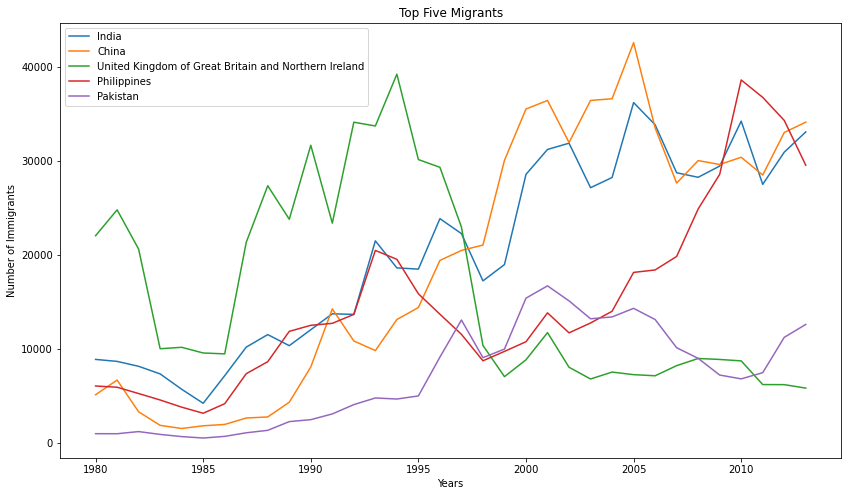

In [34]:
#sort 'total' column to get the top 5 countries
df.sort_values(by='Total', ascending=False, axis=0, inplace=True)

#get the top 5 entries
df_top5 = df.head(5)

#transpose the dataframe
df_top5 = df_top5[years].transpose()

df_top5

#plot
#covert index of df_top5 to 'int'
df_top5.index = df_top5.index.map(int)

df_top5.plot(figsize=(14,8))

plt.title('Top Five Migrants')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

In [35]:
df_top5

,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


## Area Plot (Stacked Line Plot)

<AxesSubplot:ylabel='Frequency'>

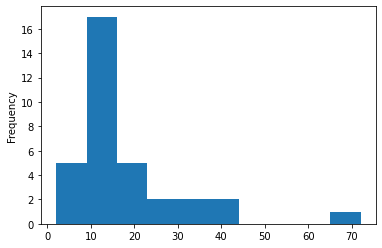

In [36]:
df.loc['Iceland', years].plot(kind='hist')

**Question**

Create an area plot that visualize the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013

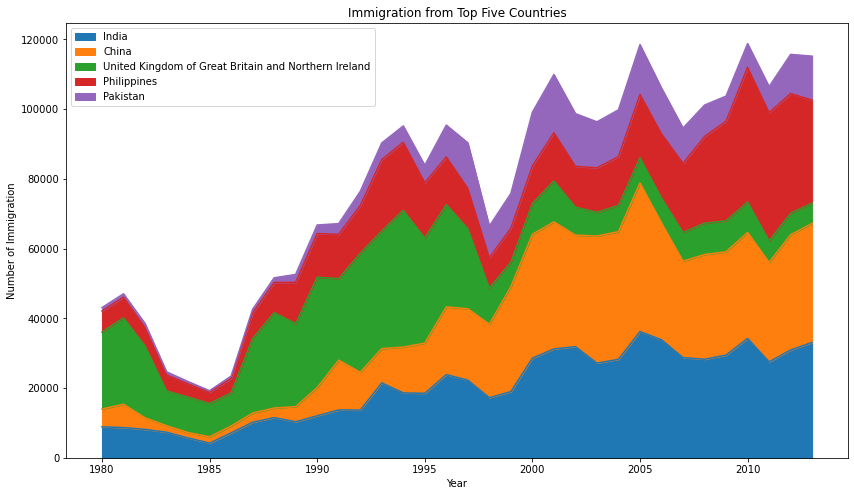

In [37]:
df_top5.plot(kind ="area", figsize=(14, 8))

plt.title('Immigration from Top Five Countries')
plt.xlabel('Year')
plt.ylabel('Number of Immigration')

plt.show()

**Area plot are usually stacked by default**

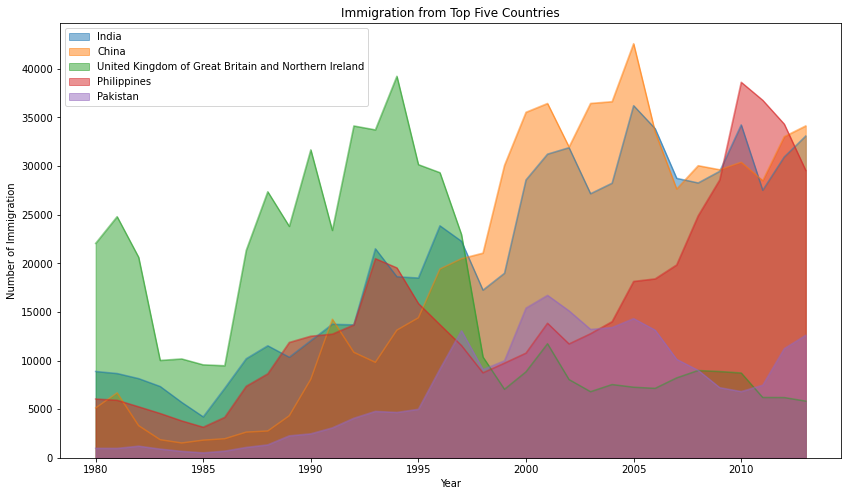

In [38]:
#plot an Unstacked area plot

df_top5.plot(kind ="area", figsize=(14, 8), stacked =False)

plt.title('Immigration from Top Five Countries')
plt.xlabel('Year')
plt.ylabel('Number of Immigration')

plt.show()

**Transparency**

Unstacked plot has a defult transparency (alpha value) at `0.5`. Let's modify this value!

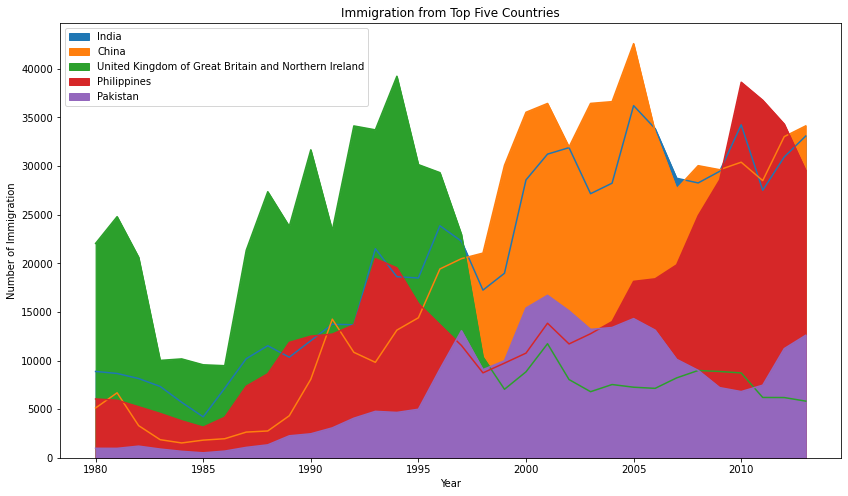

In [39]:
#alter the 'alpha' argument

df_top5.plot(kind ="area", figsize=(14, 8), stacked =False, alpha= 1)

plt.title('Immigration from Top Five Countries')
plt.xlabel('Year')
plt.ylabel('Number of Immigration')

plt.show()

## MATPLOTLIB ARTISTIC LAYER

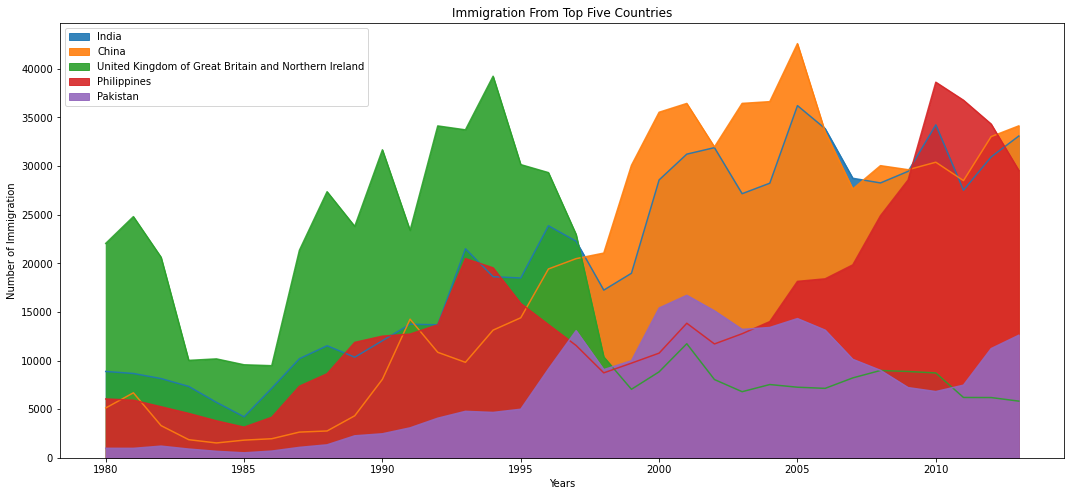

In [40]:
#**Artist Layer**

#alternative code:
ax= df_top5.plot(kind= 'area', stacked= False, figsize=(18, 8), alpha=0.9)

ax.set_title('Immigration From Top Five Countries')
ax.set_xlabel('Years')
ax.set_ylabel('Number of Immigration')

plt.show()

**Question**: Use the artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.


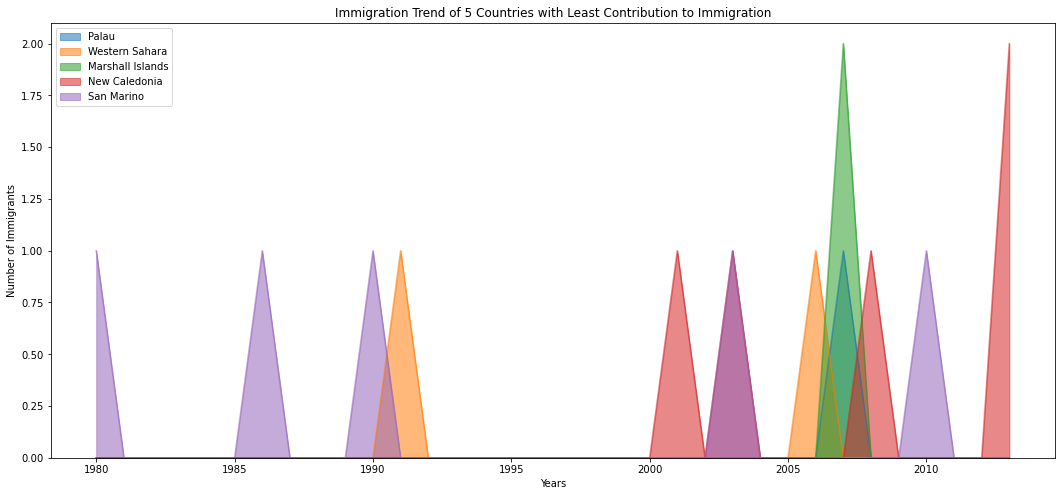

In [41]:
# 5 least contribution to immigration
df_least5 = df.sort_values('Total', ascending = True, axis=0).head(5)

#transpose
df_least5=df_least5[years].transpose()

#plot 
ax= df_least5.plot(kind='area', figsize=(18, 8), stacked= False, alpha= 0.55)
ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

plt.show()

`Alternativelty`

**least contributions**

df_least5 = df.tail(5)

**transpose the dataframe**

df_least5 = df_least5[years].transpose() 

**let's change the index values of df_least5 to type integer for plotting**

df_least5.index = df_least5.index.map(int) 
    
ax = df_least5.plot(kind='area', alpha=0.55, stacked=False, figsize=(20, 10))
    
ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')


## Histogram

**Question:** What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

Frequency count:  [178  11   1   2   0   0   0   0   1   2]
Bin ranges:  [    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


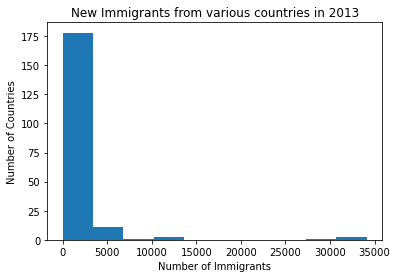

In [42]:
#examine the data split into integers
count, bin_edges= np.histogram(df['2013'])

print("Frequency count: ", count) # frequency count
print("Bin ranges: ", bin_edges) # bin ranges, default= 10 bins

#plot
df['2013'].plot(kind='hist')

plt.title('New Immigrants from various countries in 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')

plt.show()

*Side Note:* We could use `df_can['2013'].plot.hist()`, instead. In fact, throughout this lesson, using `some_data.plot(kind='type_plot', ...)` is equivalent to `some_data.plot.type_plot(...)`. That is, passing the type of the plot as argument or method behaves the same.

**Multiple Histogram on Same Plot**

**Question**: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

Text(0, 0.5, 'Number of Years')

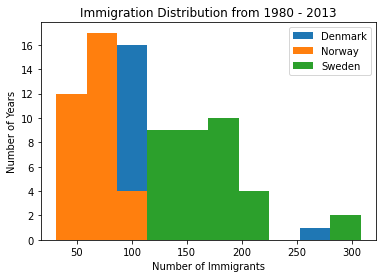

In [43]:
#create dataframe
df_DNS= df.loc[['Denmark', 'Norway', 'Sweden'], years]

#examine the data split into integers
count, bin_edges = np.histogram(df_DNS)

#transpose
df_DNS= df_DNS.transpose()

#plot
df_DNS.plot(kind='hist')

plt.title('Immigration Distribution from 1980 - 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Years')

Let's make a few modifications to improve the impact and aesthetics of the previous plot:

*   increase the bin size to 15 by passing in `bins` parameter;
*   set transparency to 60% by passing in `alpha` parameter;
*   label the x-axis by passing in `x-label` parameter;
*   change the colors of the plots by passing in `color` parameter.

Text(0, 0.5, 'Number of Years')

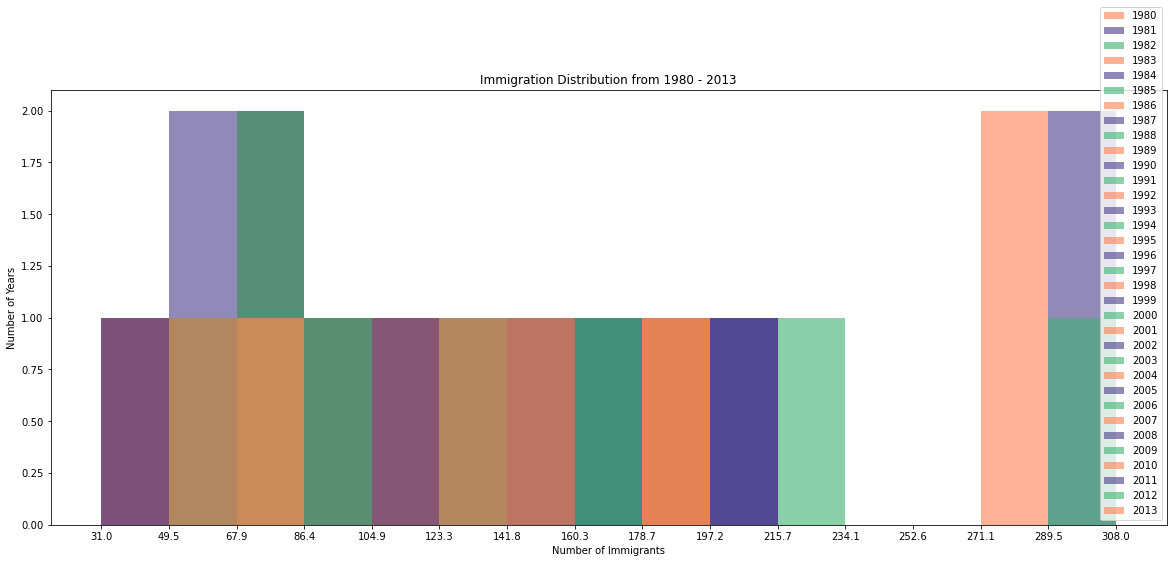

In [44]:
#examine the data split into integers
count, bin_edges = np.histogram(df_DNS,15)

#transpose
df_DNS= df_DNS.transpose()

#plot
df_DNS.plot(kind='hist',
            figsize=(20,8),
            bins=15,
            alpha = 0.6,
            xticks= bin_edges,
            color=['coral', 'darkslateblue', 'mediumseagreen']
           )

plt.title('Immigration Distribution from 1980 - 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Years')

Let's make more changes:

*    do not let the plots to overlap each other. Use the `stacked` parameter to stack them; 
*    adjust the `min` and `max` x-axis labels to remove the extra gap on the edges of the plot. Pass a tuple `(min,max)` using the `xlim` paramater.

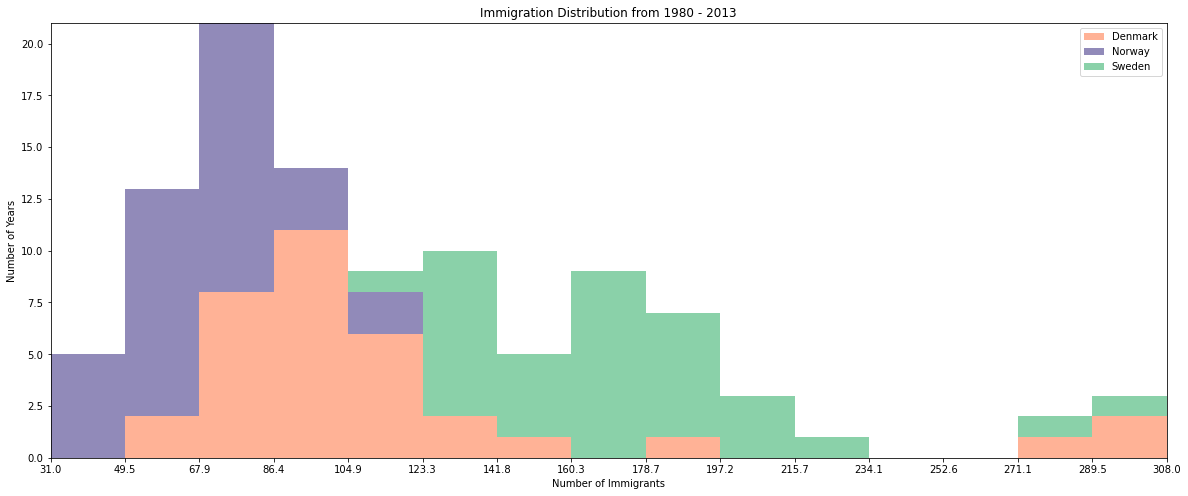

In [45]:
#examine the data split into integers
count, bin_edges = np.histogram(df_DNS,15)
xmin = bin_edges[0]   #  first bin value is 31.0, no added buffer 
xmax = bin_edges[-1]  #  last bin value is 308.0, no added buffer

#transpose
df_DNS= df_DNS.transpose()

#plot
df_DNS.plot(kind='hist',
            figsize=(20,8),
            bins=15,
            alpha = 0.6,
            xticks= bin_edges,
            color=['coral', 'darkslateblue', 'mediumseagreen'],
            stacked=True,
            xlim=(xmin, xmax)
           )

plt.title('Immigration Distribution from 1980 - 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Years')

plt.show()

**Question**: Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.


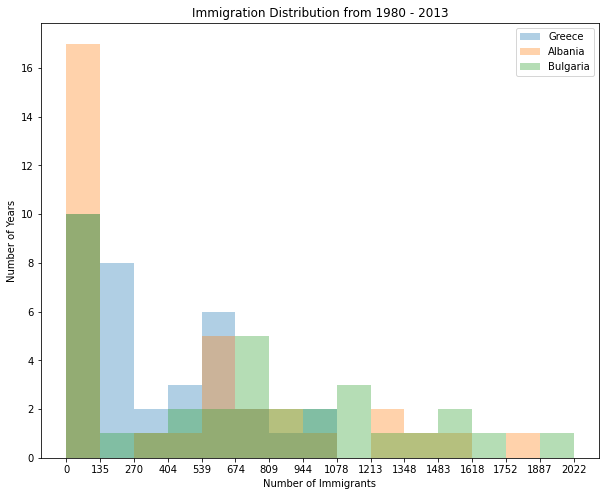

In [46]:
#get dataframe
df_GAB = df.loc[['Greece', 'Albania', 'Bulgaria'], years]

count, bin_edges = np.histogram(df_GAB, 15)

#transpose
df_GAB = df_GAB.transpose()

#plot hist
df_GAB.plot(kind='hist',
            figsize = (10,8),
            bins=15,
            alpha= 0.35,
            xticks = bin_edges
     )

plt.title('Immigration Distribution from 1980 - 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Years')

plt.show()

## BARCHART

**Vertical Bar Plot**

Vertical bar graphs are particularly useful in analyzing time series data. One disadvantage is that they lack space for text labelling at the foot of each bar.

**Let's analyze the effect of Iceland's Financial Crisis:**

The `2008 - 2011` Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.

**Question:** Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.


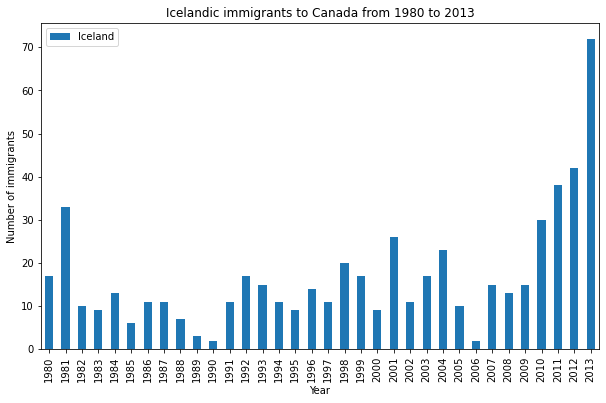

In [47]:
#create dataframe
df_ice= df.loc[['Iceland'], years]

#transpose
df_ice =df_ice.transpose()

#plot
df_ice.plot(kind= 'bar',
          figsize=(10, 6)
          )


plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot
plt.xlabel('Year')
plt.ylabel('Number of immigrants')

plt.show()

**Interpretation:** The bar plot above shows that the number of immigrants to Canada started increasing rapidly after 2008 (an impact of the financial crisis).

Let's annotate this on the plot using the `annotate` method of the **scripting layer** or the **pyplot interface**. We will pass in the following parameters:

*   `s`: str, the text of annotation.
*   `xy`: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
*   `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
*   `xycoords`: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
*   `arrowprops`: Takes a dictionary of properties to draw the arrow:
    *   `arrowstyle`: Specifies the arrow style, `'->'` is standard arrow.
    *   `connectionstyle`: Specifies the connection type. `arc3` is a straight line.
    *   `color`: Specifies color of arrow.
    *   `lw`: Specifies the line width.

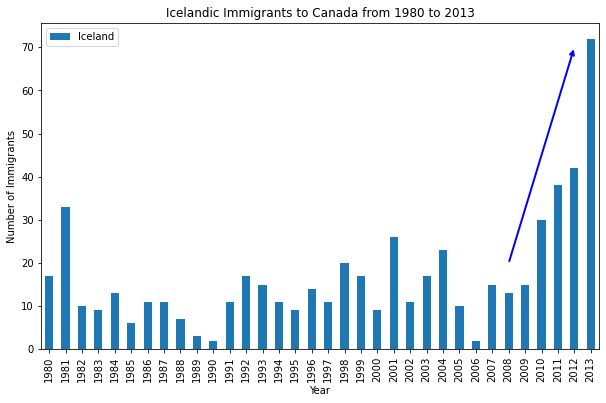

In [48]:
# rotate the xticks(labelled points on x-axis) by 90 degrees
df_ice.plot(kind='bar',
           figsize=(10, 6),
           rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->',
                             connectionstyle='arc3',
                             color='blue',
                             lw=2)
             )

plt.show()

Let's also annotate a text to go over the arrow.  We will pass in the following additional parameters:

*   `rotation`: rotation angle of text in degrees (counter clockwise)
*   `va`: vertical alignment of text \[‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
*   `ha`: horizontal alignment of text \[‘center’ | ‘right’ | ‘left’]


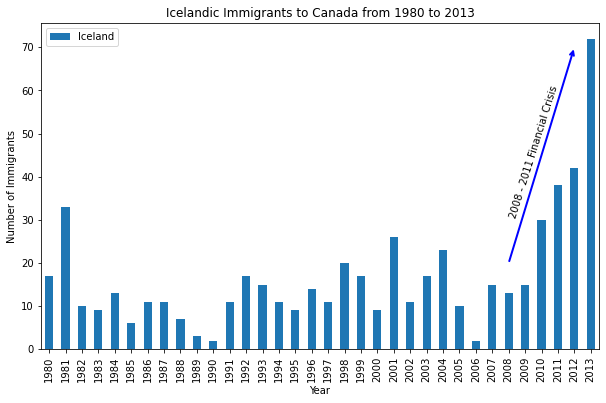

In [49]:
df_ice.plot(kind='bar', figsize=(10, 6), rot= 90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

**Horizontal Bar Plot**

Sometimes it is more practical to represent the data horizontally, especially if you need more room for labelling the bars. In horizontal bar graphs, the y-axis is used for labelling, and the length of bars on the x-axis corresponds to the magnitude of the variable being measured. As you will see, there is more room on the y-axis to  label `categorical variables`.

**Question:** Using the scripting layer, create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.


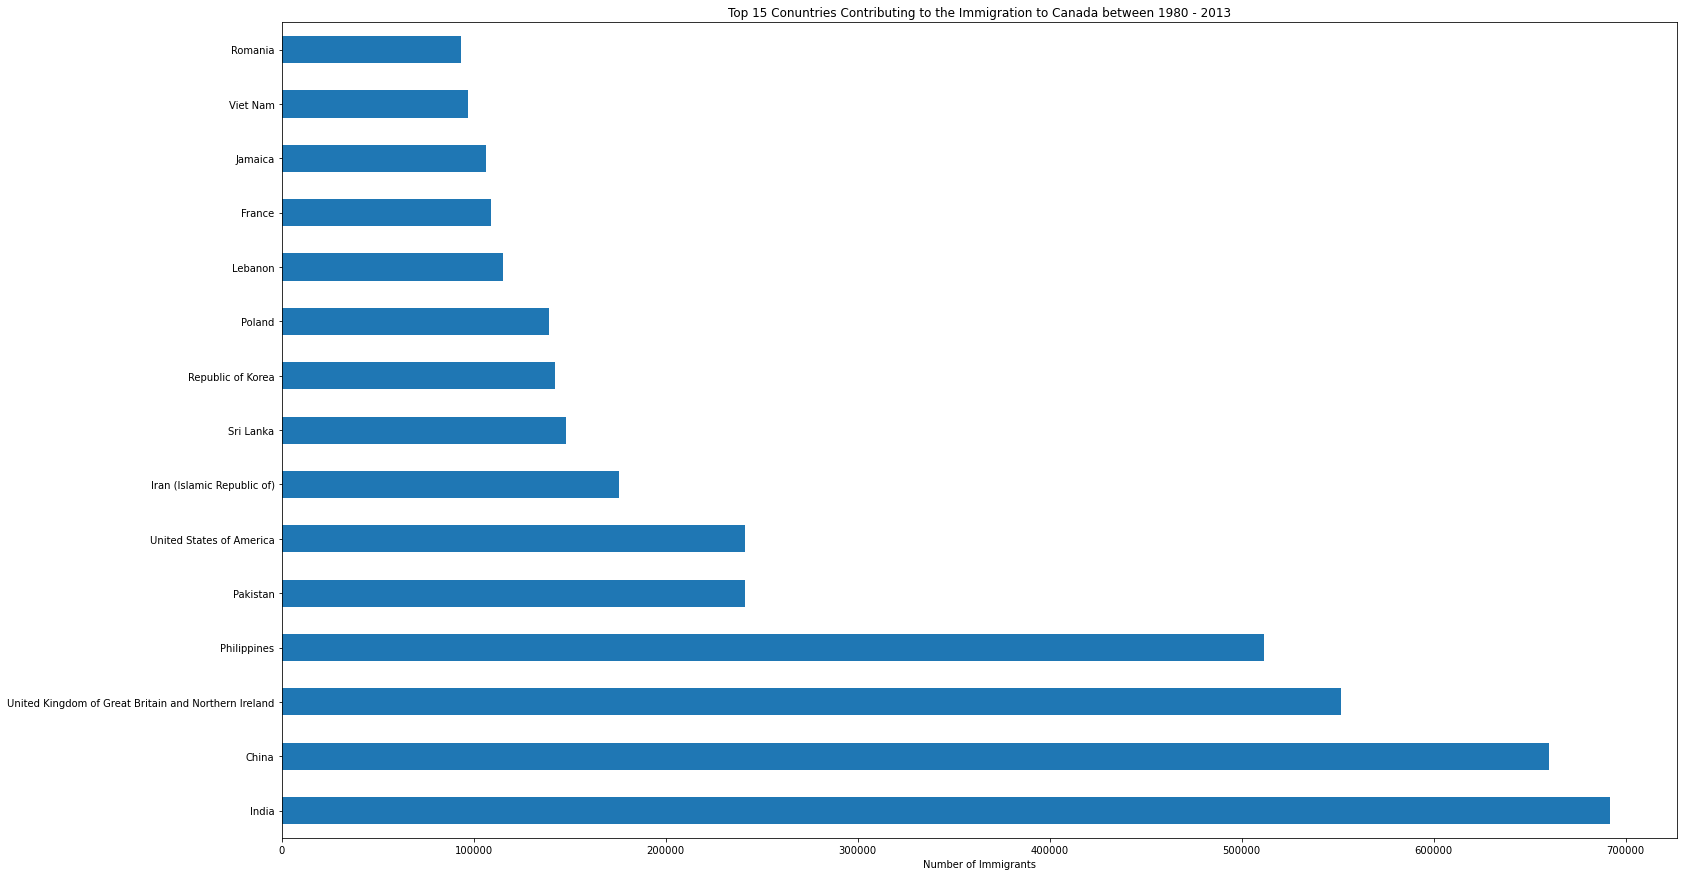

In [50]:
#sort
#df.sort_values('Total', ascending= False)

#top15 is 
df_top15 = df['Total'].head(15)

#plot
df_top15.plot(kind='barh', figsize=(25,15))
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

plt.show()


## Pie Chart

**Exercise**

Use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

In [51]:
#use `groupby` method to summarize the immigration data by `Continent`
df_continents = df.groupby('Continent').sum()



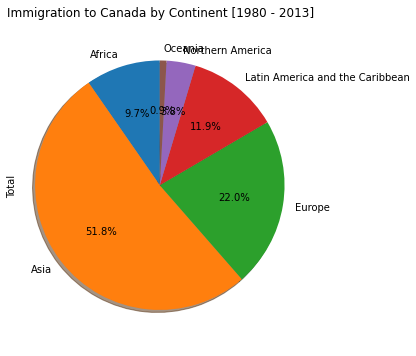

In [52]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                           figsize=(5,6),
                           autopct='%1.1f%%', # add percentage
                           startangle=90, # start angle 90° (Africa)
                            shadow= True # add shadow
                           )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.


plt.show()

Since the figure is not very clear, the numbers and text overlap in some instances, let's make a few modifications to improve the visuals:

*   Remove the text labels on the pie chart by passing in `legend` and add it as a seperate legend using `plt.legend()`.
*   Push out the percentages to sit just outside the pie chart by passing in `pctdistance` parameter.
*   Pass in a custom set of colors for continents by passing in `colors` parameter.
*   **Explode** the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Caribbean) by passing in `explode` parameter.


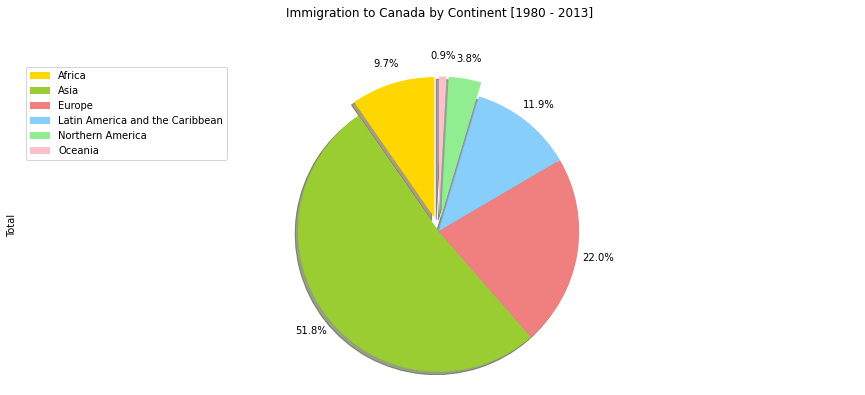

In [53]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,          # turn off labels on pie chart
                            pctdistance=1.15,     # the ratio between the center of each pie slice and the start of the text generated by autopct
                            colors=colors_list,   # add custom colors
                            explode=explode_list  # 'explode' lowest 3 continents
                           )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal')

# add legend
plt.legend(labels=df_continents.index, loc='upper left')

plt.show()

**Question:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

**Note**: You might need to play with the explore values in order to fix any overlapping slice values.


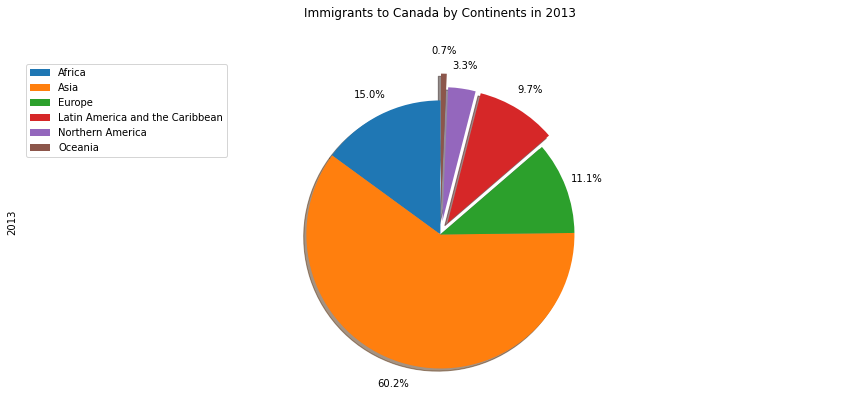

In [54]:
#dataframe
df_continents1=df_continents['2013']

explode_list=[0.0,0,0,0.1,0.1,0.2]

#plot
df_continents1.plot(kind='pie',
                   figsize=(15,6),
                   startangle=90,
                    shadow=True,
                    explode=explode_list,
                    labels=None,
                    autopct='%.1f%%',
                    pctdistance=1.17
                   )
plt.title('Immigrants to Canada by Continents in 2013', y= 1.11)

#set pie chart to look like a circle
plt.axis('equal')

#add legend
plt.legend(labels=df_continents1.index, loc='upper left')
plt.show()

## Box Plot

**Exercise** 

Plot a box plot for the Japanese immigrants between 1980 - 2013

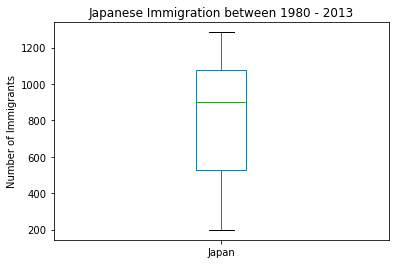

In [55]:
#dataframe
df_japan= df.loc[['Japan'], years]

#transpose
df_japan=df_japan.transpose()

#plot
df_japan.plot(kind='box')

plt.title('Japanese Immigration between 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.show()

We can immediately make a few key observations from the plot above:

1.  The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and  median number of immigrants is around 900 (median).
2.  25% of the years for period 1980 - 2013 had an annual immigrant count of \~500 or fewer (First quartile).
3.  75% of the years for period 1980 - 2013 had an annual immigrant count of \~1100 or fewer (Third quartile).

We can view the actual numbers by calling the `describe()` method on the dataframe.


In [56]:
#actual statistical numbers
df_japan.describe()

,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In one of the previous labs, we observed that China and India had very similar immigration trends. Let's analyze these two countries further using box plots.

**Question:** Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

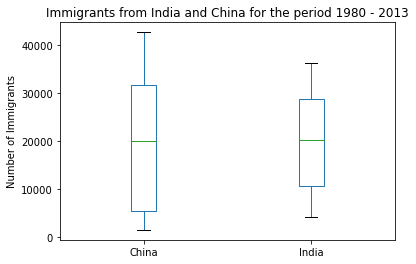

In [57]:
#dataframe
df_ci=df.loc[['China', 'India'], years]

#transpose
df_ci=df_ci.transpose()

#plot
df_ci.plot(kind='box')

plt.title('Immigrants from India and China for the period 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [58]:
#actual statistical values

df_ci.describe()

,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


**Interpretation**

We can observe that, while both countries have around the same median immigrant population (\~20,000),  China's immigrant population range is more spread out than India's. The maximum population from India for any year (36,210) is around 15% lower than the maximum population from China (42,584).

**Horizontal Box Plot**

To create horizontal box plots,pass the `vert` parameter in the **plot** function and assign it to *False*.

You can also specify a different `color` in case you are not a big fan of the default red color.

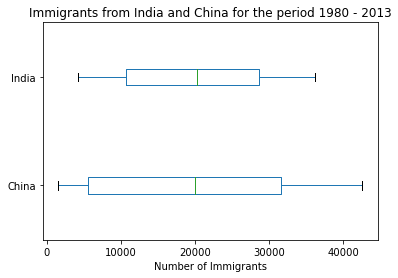

In [59]:
df_ci.plot(kind='box', vert=False)

plt.title('Immigrants from India and China for the period 1980 - 2013')
plt.xlabel('Number of Immigrants')

plt.show()

**Subplot on Artistic Layer** 

We might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a **`figure`** (overall canvas) and divide it into **`subplots`**, each containing a plot. With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**.

Where

*   `nrows` and `ncols` are used to notionally split the figure into (`nrows` \* `ncols`) sub-axes,
*   `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` \* `ncols` as shown below.

**NOTE**

        subplot(121) == subplot(1,2,1)


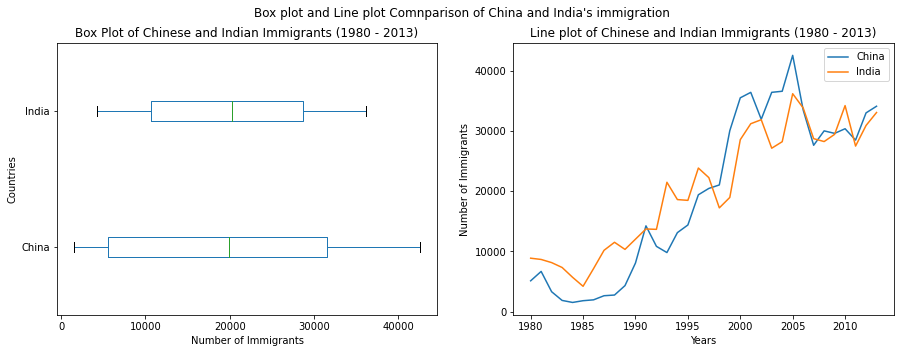

In [60]:
#artistic layer
fig= plt.figure()  #create figure

ax0= fig.add_subplot(1,2,1) # add subplot
ax1= fig.add_subplot(1,2,2) # add subplot

#subplot: box plot
df_ci.plot(kind='box', figsize=(15,5), vert=False, ax=ax0)
ax0.set_title('Box Plot of Chinese and Indian Immigrants (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

#subplot: line plot
df_ci.plot(kind='line', figsize=(15,5), ax=ax1)
ax1.set_title('Line plot of Chinese and Indian Immigrants (1980 - 2013)')
ax1.set_xlabel('Years')
ax1.set_ylabel('Number of Immigrants')

plt.suptitle("Box plot and Line plot Comnparison of China and India's immigration")

plt.show()

**Questions:** Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

Step 1: Get the dataset.

Step 2: Create a new dataframe which contains the aggregate for each decade. One way to do that:

1.  Create a list of all years in decades 80's, 90's, and 00's.
2.  Slice the `original dataframe` **df** to create a series for each decade and sum across all years for each country.
3.  Merge the three series into a new data frame.


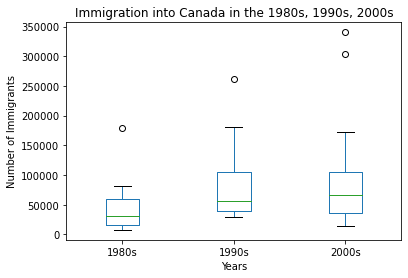

In [61]:
#df_top15
df_top15= df.head(15)

#group by 80s, 90s, 00s
#create a list of all years in 1980s, 1990s, 2000s
years_80s = list(map(str, range(1980, 1990)))
years_90s = list(map(str, range(1990, 2000)))
years_00s = list(map(str, range(2000, 2010)))

#slice original dataframe to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1)
df_90s = df_top15.loc[:, years_90s].sum(axis=1)
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

#merge the three series into a dataframe
new_df = pd.DataFrame({'1980s':df_80s, '1990s':df_90s, '2000s':df_00s})

#plot
new_df.plot(kind='box')

plt.title('Immigration into Canada in the 1980s, 1990s, 2000s')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')


plt.show()

#df_top15.plot(kind='box')

In [62]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


Note how the box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:<br>

*   larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
*   smaller than Q1 by at least 1.5 times the IQR.

**Let's look at decade 2000s as an example:** <br>

*   Q1 (25%) = 36,101.5 <br>
*   Q3 (75%) = 105,505.5 <br>
*   IQR = Q3 - Q1 = 69,404 <br>

Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 105,505.5 + (1.5 * 69,404) <br>
Outlier > 209,611.5


**Question** Let's check how many entries fall above the outlier threshold (209,611.5).


In [63]:
new_df.reset_index()
new_df[new_df['2000s']> 209611.5]


,1980s,1990s,2000s
India,82154,180395,303591
China,32003,161528,340385


**Interpretation**

India and China are both considered outliers since their population in the 2000s exceeds 209611.5

**Let's look at decade 1900s as an example:** <br>

*   Q1 (25%) = 39259.0 <br>
*   Q3 (75%) = 104451.5 <br>
*   IQR = Q3 - Q1 = 65192.5 <br>

Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 104451.5 + (1.5 * 65192.5) <br>
Outlier > 202240.25


**Question** Let's check how many entries fall above the outlier threshold (202240.25).

In [64]:
new_df.reset_index()
new_df[new_df['1990s']>202240.25]

,1980s,1990s,2000s
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413


**Interpretation**

United Kingdom of Great Britain and Northern Ireland is considered an outlier since their population in the 1900s exceeds 202240.25

**Let's look at decade 1980s as an example:** <br>

*   Q1 (25%) = 16698.0 <br>
*   Q3 (75%) = 59183.0 <br>
*   IQR = Q3 - Q1 = 42485.0 <br>

Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 59183.0 + (1.5 * 42485.0) <br>
Outlier > 122910.5


In [65]:
new_df.reset_index()
new_df[new_df['1980s']> 122910.5]

,1980s,1990s,2000s
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413


**Interpretation**

United Kingdom of Great Britain and Northern Ireland is considered an outlier since their population in the 1980s exceeds 122910.5

## Scatter Plot

**Exercise**

Using a `scatter plot`, let's visualize the trend of total immigration to Canada (all countries combined) for the years 1980 - 2013.

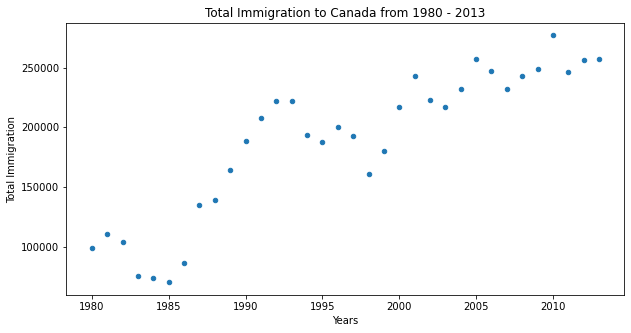

In [66]:
#Total Immigration (all countries combined)
df_tot = pd.DataFrame(df.loc[:,years].sum(axis=0))

#change years into integer (useful for regression later)
df_tot.index = map(int, df_tot.index)

#reset index
df_tot.reset_index(inplace=True)

#rename columns
df_tot.columns= ['Years', 'Total']

#view the final dataframe
df_tot

#plot
df_tot.plot(kind='scatter', x='Years', y= 'Total', figsize =(10,5))

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Years')
plt.ylabel('Total Immigration')

plt.show()

<AxesSubplot:xlabel='Years', ylabel='Total'>

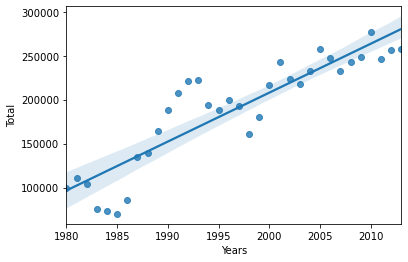

In [70]:
sns.regplot(data= df_tot)